# Post-synaptic response of a single synapse  in an active e-model

Adapted from https://github.com/LFPy/LFPy/blob/master/examples/LFPy-example-04.ipynb

Modified by  Darshan Mandge and Ilkan Kiliç, Open Brain Institute

Copyright (c) 2025 Open Brain Institute

In [1]:
# compile mechanisms before before calling LFPy
!nrnivmodl cadpyr/mechanisms/

/Users/mandge/Desktop/obi/repos/.venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/usr/bin/xcrun
/Users/mandge/Desktop/obi/repos/obi_platform_analysis_notebooks/Cellular/LFPy
Mod files: "cadpyr/mechanisms/cadpyr/mechanisms//CaDynamics_DC0.mod" "cadpyr/mechanisms/cadpyr/mechanisms//Ca_HVA2.mod" "cadpyr/mechanisms/cadpyr/mechanisms//Ca_LVAst.mod" "cadpyr/mechanisms/cadpyr/mechanisms//Ih.mod" "cadpyr/mechanisms/cadpyr/mechanisms//K_Pst.mod" "cadpyr/mechanisms/cadpyr/mechanisms//K_Tst.mod" "cadpyr/mechanisms/cadpyr/mechanisms//NaTg.mod" "cadpyr/mechanisms/cadpyr/mechanisms//Nap_Et2.mod" "cadpyr/mechanisms/cadpyr/mechanisms//ProbAMPANMDA_EMS.mod" "cadpyr/mechanisms/cadpyr/mechanisms//SK_E2.mod" "cadpyr/mechanisms/cadpyr/mechanisms//SKv3_1.mod"

Creating 'arm64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../cadpyr/mechanisms//CaDynamics_DC0.m

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import LFPy

--No graphics will be displayed.


Then, create the cell object using the `LFPy.Cell` 
class, specifying the morphology file.
The passive mechanisms
are not switched on by default.

In [3]:
cell = LFPy.Cell(morphology='cadpyr/C060114A5.asc', 
                 custom_code=['cadpyr/model.hoc'],
                 passive=False)

Then, align apical dendrite with z-axis:

In [4]:
# cell.set_rotation(x=4.98919, y=-4.33261, z=0.)
# cell.set_rotation(x=4.0, y=-4.0, z=0.0)
cell.set_rotation(x=4.98919, y=9.3, z=0)

One can now use `LFPy.Synapse` class to insert a single 
synapse onto the soma compartment, and set the spike time(s) using `LFPy.Synapse.set_spike_times()` method:

In [5]:
synapse = LFPy.Synapse(cell, 
                       idx=cell.get_idx("soma[0]"),
                       syntype='Exp2Syn', 
                       weight=0.005, 
                       e=0, 
                       tau1=0.5,
                       tau2=2,
                       record_current=True)
synapse.set_spike_times(np.array([20., 40]))

We now have what we need in order to calculate the postsynaptic response,
using a built in method `LFPy.Cell.simulate()` to run the simulation.

In [6]:
cell.simulate()

Then 
plot the model geometry, synaptic current and somatic potential:

(-500.0, 500.0, -550.0, 750.0)

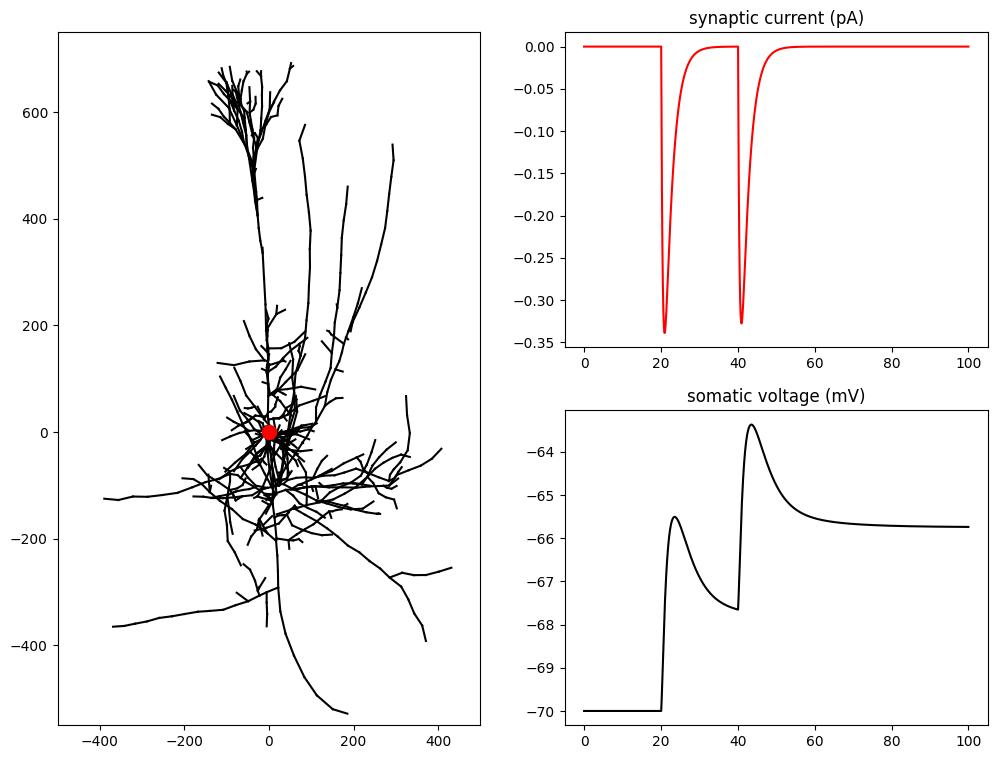

In [7]:
plt.figure(figsize=(12, 9))
plt.subplot(222)
plt.plot(cell.tvec, synapse.i, 'r')
plt.title('synaptic current (pA)')
plt.subplot(224)
plt.plot(cell.tvec, cell.somav, 'k')
plt.title('somatic voltage (mV)')
plt.subplot(121)
plt.plot(cell.x.T, cell.z.T, 'k')
plt.plot(synapse.x, synapse.z,
         color='r', marker='o', markersize=10)
plt.axis([-500, 500, -550, 750])

# savefig('LFPy-example-01.pdf', dpi=200)